# PUF Counties Aggregate - Regression 

DeSYNPuf Counties Aggregate with Elixhauser Sums per User & RWJF Factor Rankings Dataset

In [1]:
%matplotlib inline
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing as pre
import statsmodels.api as sm

The file contains aggregated Medicare data from 2008-2010 (DeSYNPuf Synthetic Public Use Files), and RWJF County Health Factors and Outcomes Ranking Data from 2010.

2694 out of 3012 counties will be analyzed.

The following rules were applied to transform variables and eliminate outliers before performing this analysis:

1. TOT_VSTS_PB cut >= 20
2. CODES_PU cut >= 25
3. PROCS_PU cut >= 30
4. IPDAYS_PU transformed to square root(IPDAYS_PU), cut >= 4.5 and 0 values transformed to 0.1
5. TOT_CC_INCD cut >= 4.5
6. COST_PB transformed to square root(COST_PB), cut > 520
7. CNTY_IP_PROP cut >= 0.25 and IP_PROP = 1 excluded (2 rows)
8. CNTY_USR_PROP cut <= 0.2

Total counties removed = 179 rows

In [2]:
medicare_counties = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_MERGED_CLUST_OUTLIERS_REM.csv")
medicare_counties.shape


(2694, 79)

In [3]:
medicare_counties.drop(columns=medicare_counties.columns[0], axis=1, inplace=True, errors="ignore")

In [4]:
medicare_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 78 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS_STATE_CODE         2694 non-null   int64  
 1   FIPS_COUNTY_CODE        2694 non-null   int64  
 2   CNTY_BENE_CT            2694 non-null   int64  
 3   CNTY_BENE_USRS          2694 non-null   int64  
 4   CNTY_MEAN_AGE           2694 non-null   float64
 5   CNTY_SEX_PROP           2694 non-null   float64
 6   TOT_CNCR_CASES          2694 non-null   int64  
 7   TOT_STRKETIA_CASES      2694 non-null   int64  
 8   TOT_ESRD_CASES          2694 non-null   int64  
 9   CNTY_TOT_VSTS           2694 non-null   int64  
 10  CNTY_TOT_IP_VSTS        2694 non-null   int64  
 11  CNTY_TOT_OP_VSTS        2694 non-null   int64  
 12  CNTY_TOT_CODES          2694 non-null   float64
 13  CNTY_TOT_PROCS          2694 non-null   float64
 14  CNTY_MEAN_IP_STAY       2694 non-null   

## Regression

The purpose of this notebook is attempt to recreate Dhara's regression analysis in python after trimming some outliers and doing some variable scaling per the above description.

Since the data is now normally distributed, I will attempt an OLS regression model, which may (hopefully) be easy to interpret.

In [5]:
X1 = medicare_counties[["CNTY_MEAN_AGE", "CNTY_SEX_PROP", "DIVERSE_PROP", "CNTY_MEAN_CCS", "TOT_ELIX_PU", 
                        "HF_PROP_RANK"]]
Y1 = medicare_counties[["SR[TOT_COST_PB]"]]
X1

,CNTY_MEAN_AGE,CNTY_SEX_PROP,DIVERSE_PROP,CNTY_MEAN_CCS,TOT_ELIX_PU,HF_PROP_RANK
0,65.4,0.187500,0.312500,4.937500,1.492308,0.851
1,70.3,0.463158,0.368421,3.747368,1.651029,0.955
2,72.4,0.642857,0.500000,3.500000,1.791204,0.194
3,69.0,0.411765,0.294118,4.470588,1.985728,0.716
4,71.5,0.200000,0.200000,3.000000,0.760913,0.075
...,...,...,...,...,...,...
2689,70.6,0.434783,0.043478,3.086957,1.201580,0.278
2690,73.3,0.470588,0.058824,4.176471,2.069084,0.764
2691,72.7,0.366667,0.166667,3.033333,1.585815,0.944
2692,56.8,0.250000,0.250000,2.750000,0.361111,0.236


In [6]:
Y1

,SR[TOT_COST_PB]
0,212.555581
1,283.894532
2,258.323717
3,215.654135
4,198.311876
...,...
2689,123.855807
2690,226.945186
2691,205.221181
2692,100.079968


In [7]:
model = sm.OLS(Y1, sm.add_constant(X1)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        SR[TOT_COST_PB]   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     191.9
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          6.56e-204
Time:                        19:54:14   Log-Likelihood:                -15342.
No. Observations:                2694   AIC:                         3.070e+04
Df Residuals:                    2687   BIC:                         3.074e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.4507     22.221      1.190      0.234     -17.121      70.022
CNTY_MEAN_AGE    -0.1126      0.283     -0.397      0.691      -0.668       0.443
CNTY_SEX_PROP     0.4130      8.155      0.051      0.960     -15.578      16.404
DIVERSE_PROP     39.0432      9.715      4.019      0.000      19.993      58.093
CNTY_MEAN_CCS    33.4771      1.291     25.926      0.000      30.945      36.009
TOT_ELIX_PU      33.4204      2.727     12.256      0.000      28.074      38.767
HF_PROP_RANK     13.9299      4.789      2.909      0.004       4.540      23.320
==============================================================================
Omnibus:                      110.742   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.029
Skew:                           0.184   Prob(JB):                     2.85e-63
Kurtosis:                       4.559   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

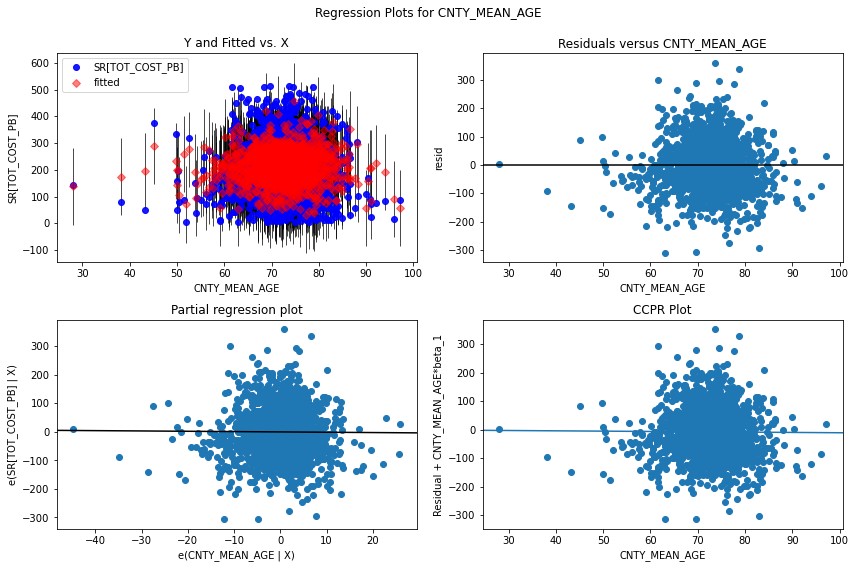

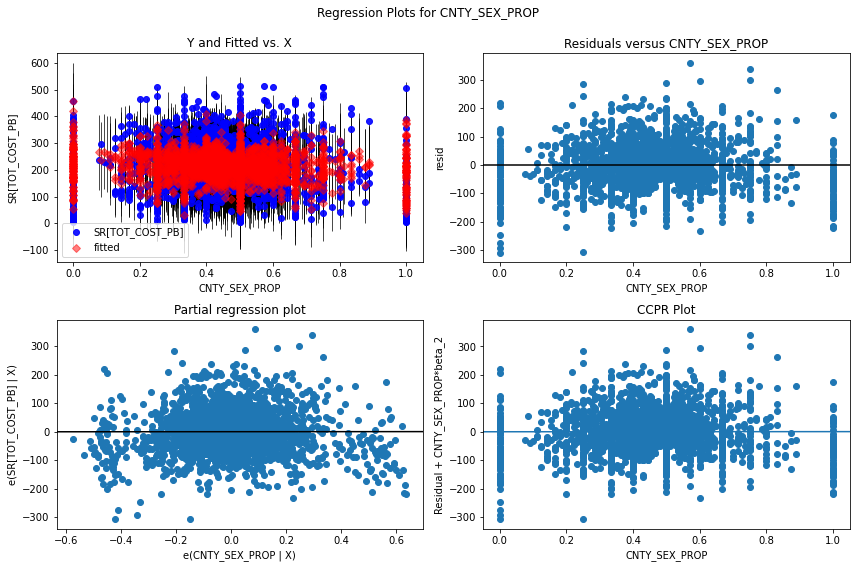

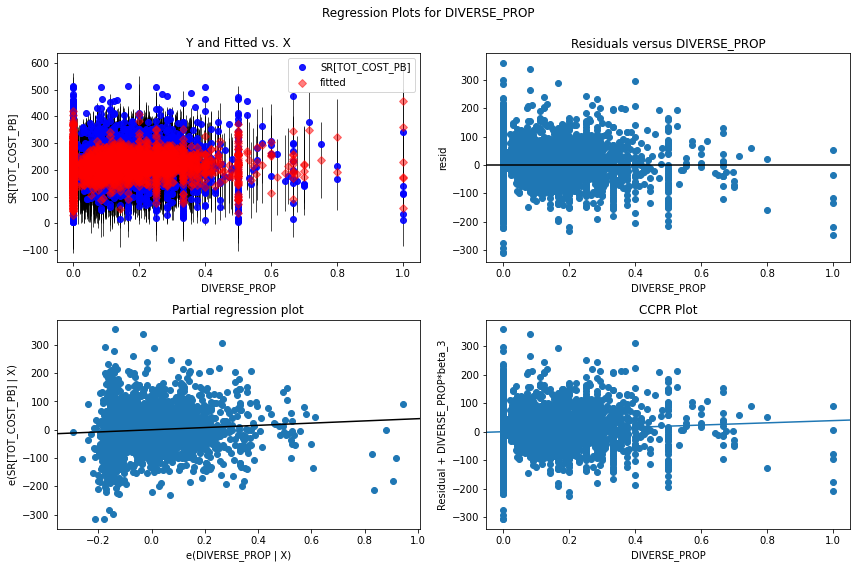

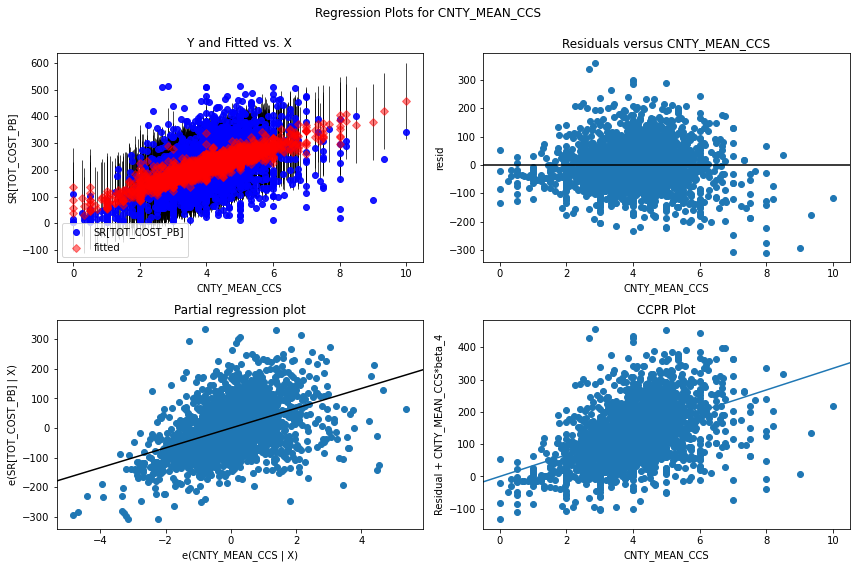

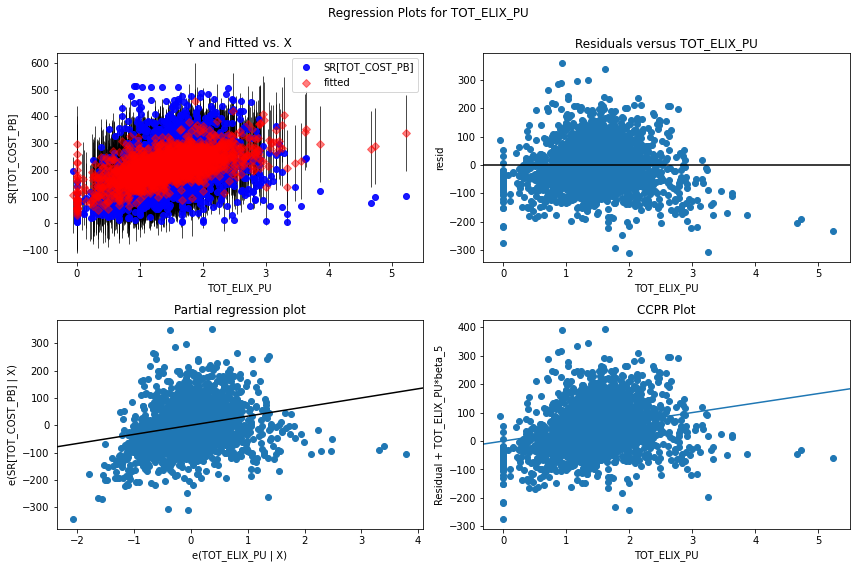

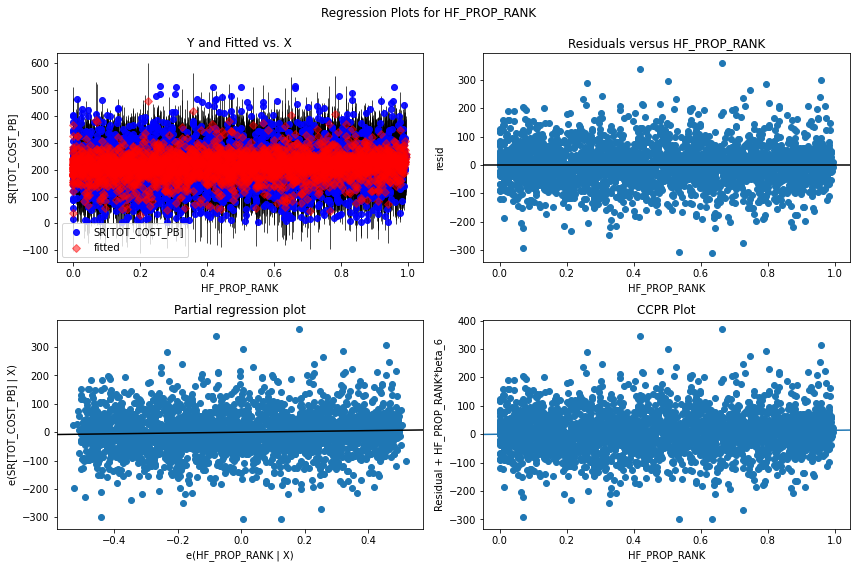

In [8]:
# Create diagnostic plots for all the x variables
variables = X1.columns
for v in variables:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, v, fig=fig)

## Initial Model Review

While the Co-Efficient values are necessarily different, the significance indications of the covariates are similar to Dhara's GENMOD model, with DIVERSE_PROP, CNTY_MEAN_CCS, TOT_ELIX_PU and HF_PROP_RANK carrying significance.

Kurtosis is > 3, even after transformation and outliers removal but skew is well-controlled.

I'm going to try reworking the variables in this model to better reflect those that we were successfully able to use in some of our other analyses to explain more of the variation in the cost.

In [9]:
# I will begin with Age, Sex and Race indicators in the model, and may remove them if they are not signficant.

X2 = medicare_counties[["CNTY_MEAN_AGE", "CNTY_SEX_PROP", "DIVERSE_PROP", "CNTY_IP_PROP", "TOT_VSTS_PB", 
                       "CODES_PU", "PROCS_PU", "PRVDRS_PU", "SR[TOT_IPDAYS_PU]", "TOT_CC_PREV", "TOT_CC_INCD",
                       "TOT_ELIX_PU"]]
Y2 = medicare_counties[["SR[TOT_COST_PB]"]]
X2


,CNTY_MEAN_AGE,CNTY_SEX_PROP,DIVERSE_PROP,CNTY_IP_PROP,TOT_VSTS_PB,CODES_PU,PROCS_PU,PRVDRS_PU,SR[TOT_IPDAYS_PU],TOT_CC_PREV,TOT_CC_INCD,TOT_ELIX_PU
0,65.4,0.187500,0.312500,0.080357,7.000000,9.923077,10.487179,2.307692,1.921538,4.937500,2.562500,1.492308
1,70.3,0.463158,0.368421,0.076389,7.578947,12.179487,13.964103,3.297436,2.369680,3.747368,1.705263,1.651029
2,72.4,0.642857,0.500000,0.097826,6.571429,9.000000,9.388889,1.888889,2.198484,3.500000,1.785714,1.791204
3,69.0,0.411765,0.294118,0.052632,8.941176,11.694444,13.833333,2.833333,2.160247,4.470588,2.588235,1.985728
4,71.5,0.200000,0.200000,0.048780,8.200000,19.333333,22.500000,4.500000,1.414214,3.000000,1.400000,0.760913
...,...,...,...,...,...,...,...,...,...,...,...,...
2689,70.6,0.434783,0.043478,0.058824,4.434783,6.761905,7.976190,1.357143,1.336306,3.086957,1.826087,1.201580
2690,73.3,0.470588,0.058824,0.068493,8.588235,9.922222,12.888889,1.666667,1.949359,4.176471,1.529412,2.069084
2691,72.7,0.366667,0.166667,0.054645,6.100000,11.800000,14.222222,1.422222,1.983263,3.033333,1.233333,1.585815
2692,56.8,0.250000,0.250000,0.066667,3.750000,7.000000,7.666667,1.500000,1.414214,2.750000,0.750000,0.361111


In [10]:
model = sm.OLS(Y2, sm.add_constant(X2)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        SR[TOT_COST_PB]   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     653.3
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:54:18   Log-Likelihood:                -13981.
No. Observations:                2694   AIC:                         2.799e+04
Df Residuals:                    2681   BIC:                         2.806e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -21.0982     13.641     -1.547      0.122     -47.845       5.649
CNTY_MEAN_AGE         0.0312      0.172      0.182      0.856      -0.306       0.368
CNTY_SEX_PROP         2.1044      4.939      0.426      0.670      -7.580      11.789
DIVERSE_PROP          9.8100      5.896      1.664      0.096      -1.751      21.371
CNTY_IP_PROP        425.4996     35.668     11.929      0.000     355.560     495.439
TOT_VSTS_PB          12.8418      0.703     18.267      0.000      11.463      14.220
CODES_PU              5.1544      0.708      7.285      0.000       3.767       6.542
PROCS_PU              1.6027      0.418      3.834      0.000       0.783       2.422
PRVDRS_PU            -2.8503      1.545     -1.845      0.065      -5.880       0.179
SR[TOT_IPDAYS_PU]    38.1938      2.000     19.099      0.000      34.272      42.115
TOT_CC_PREV          -0.7789      1.355     -0.575      0.566      -3.437       1.879
TOT_CC_INCD          -0.5177      1.898     -0.273      0.785      -4.240       3.205
TOT_ELIX_PU         -13.8303      1.847     -7.490      0.000     -17.451     -10.209
==============================================================================
Omnibus:                      273.339   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              955.356
Skew:                           0.480   Prob(JB):                    3.52e-208
Kurtosis:                       5.755   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

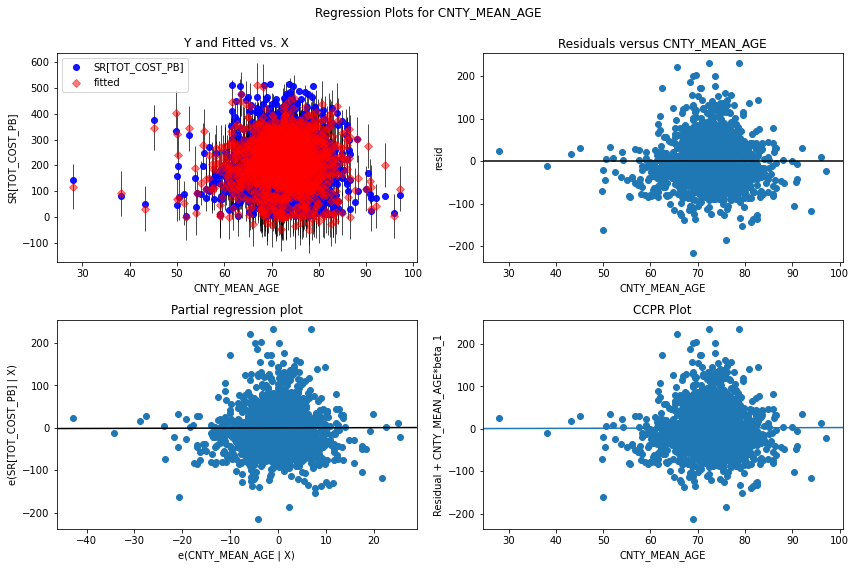

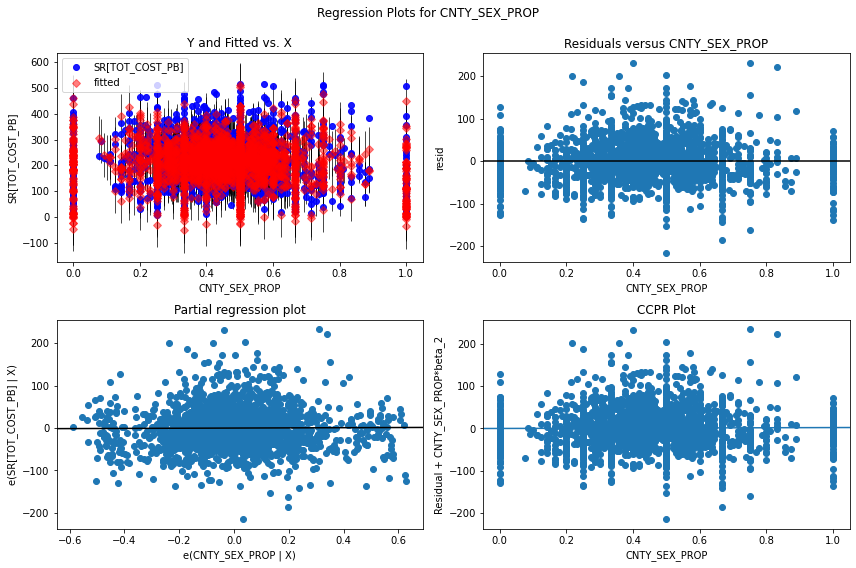

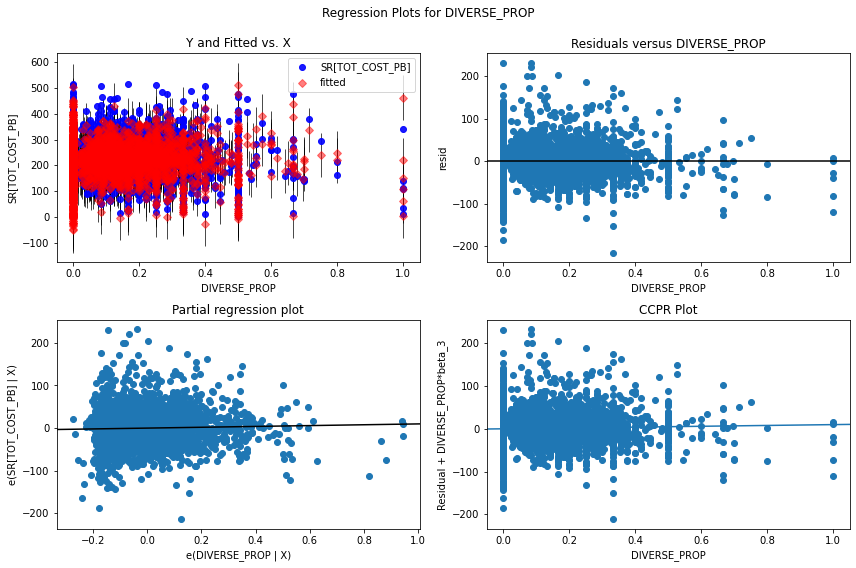

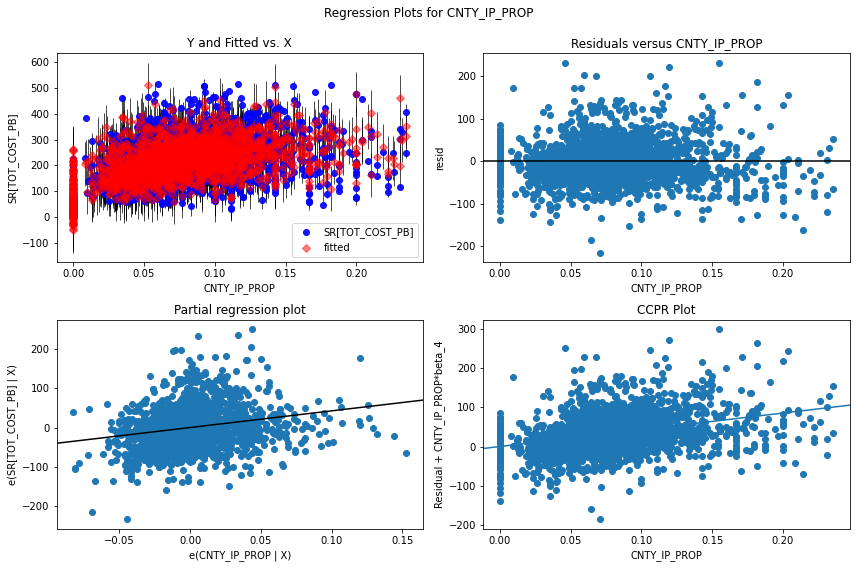

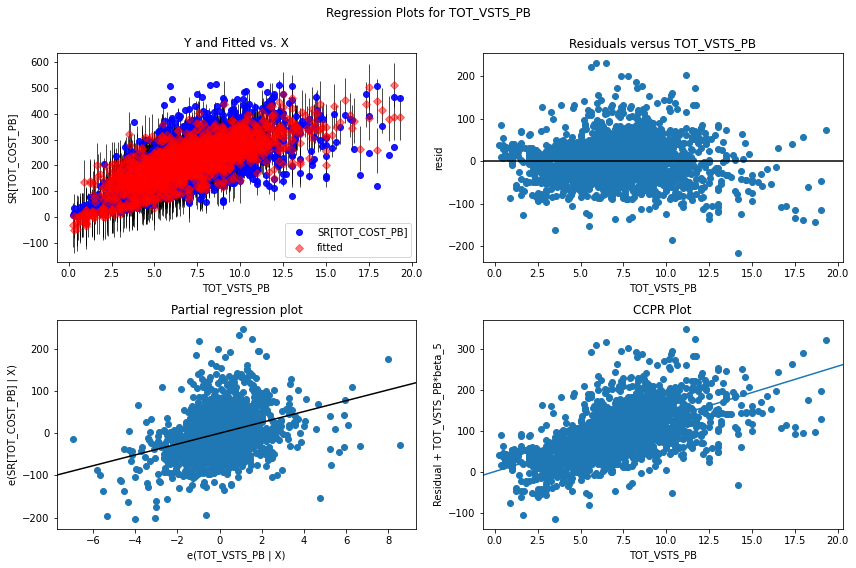

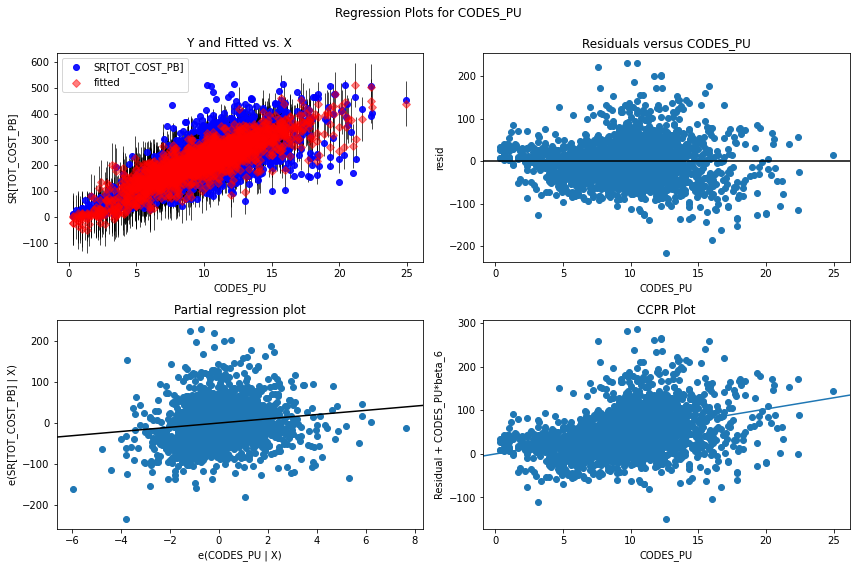

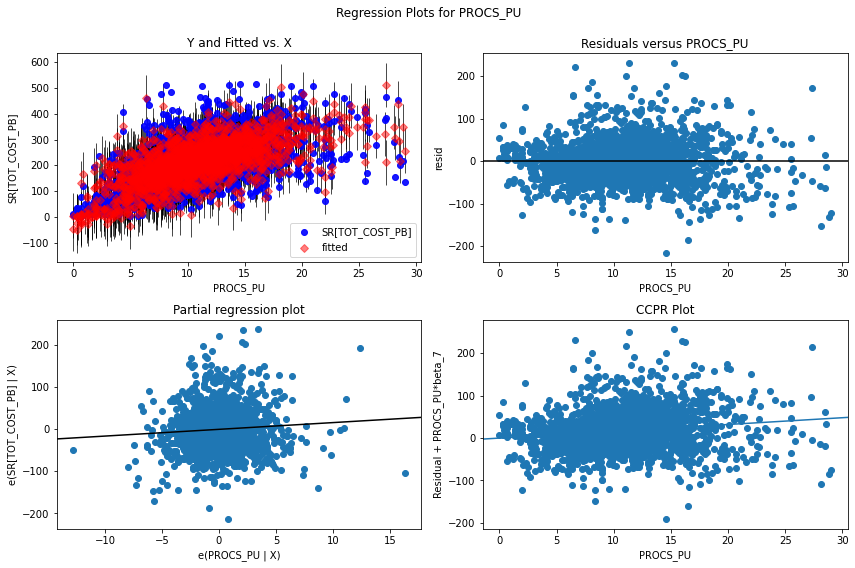

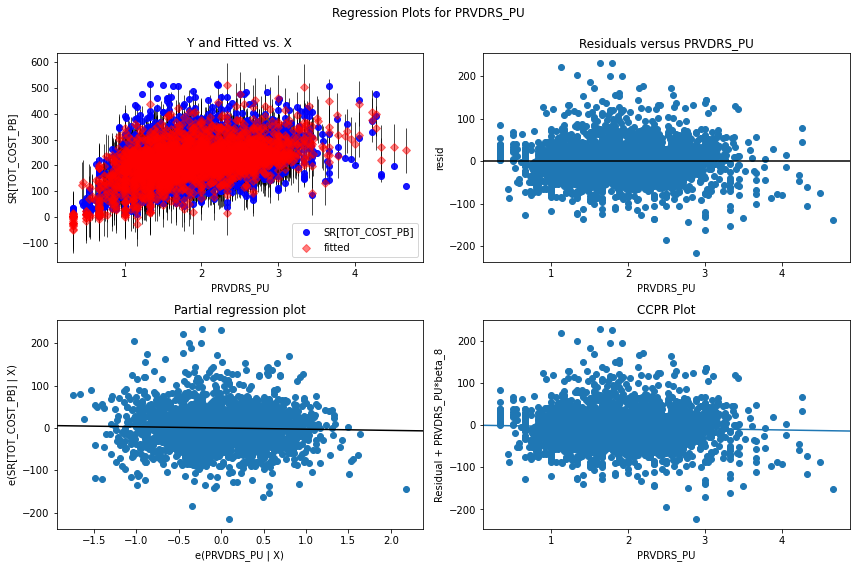

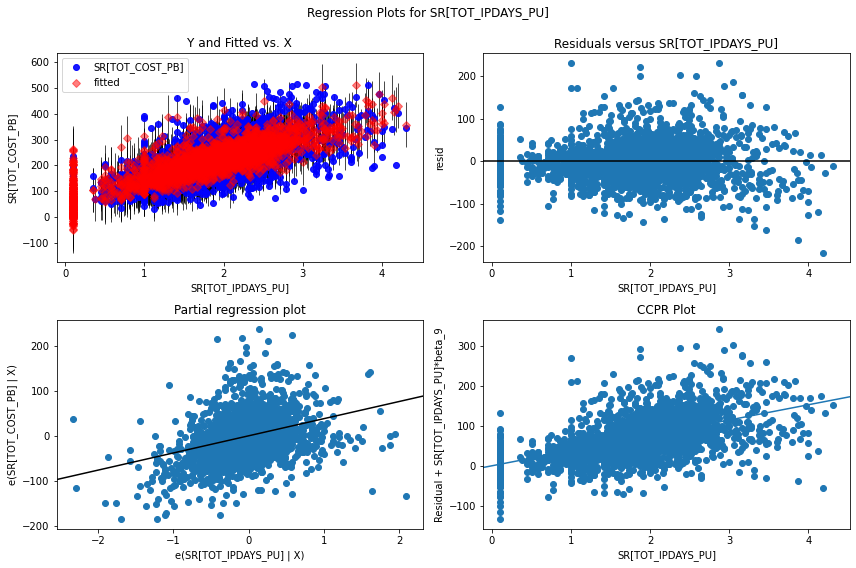

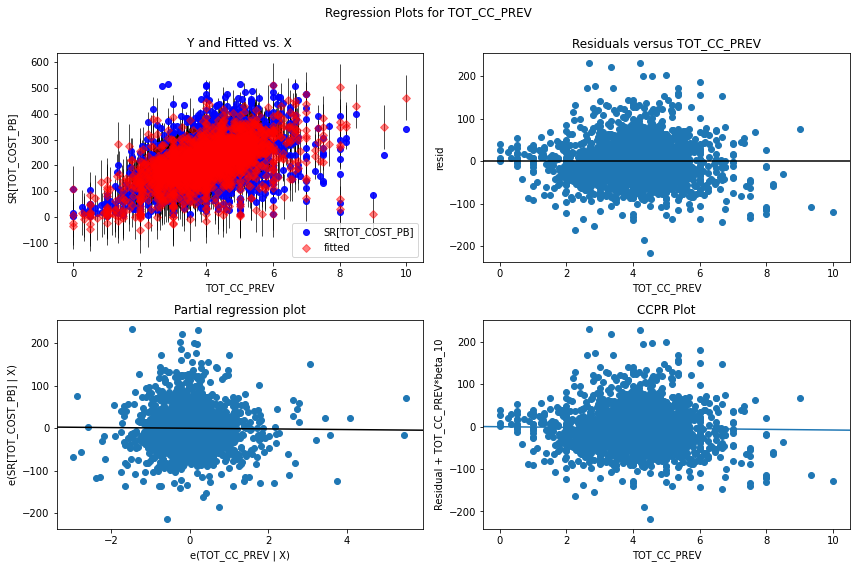

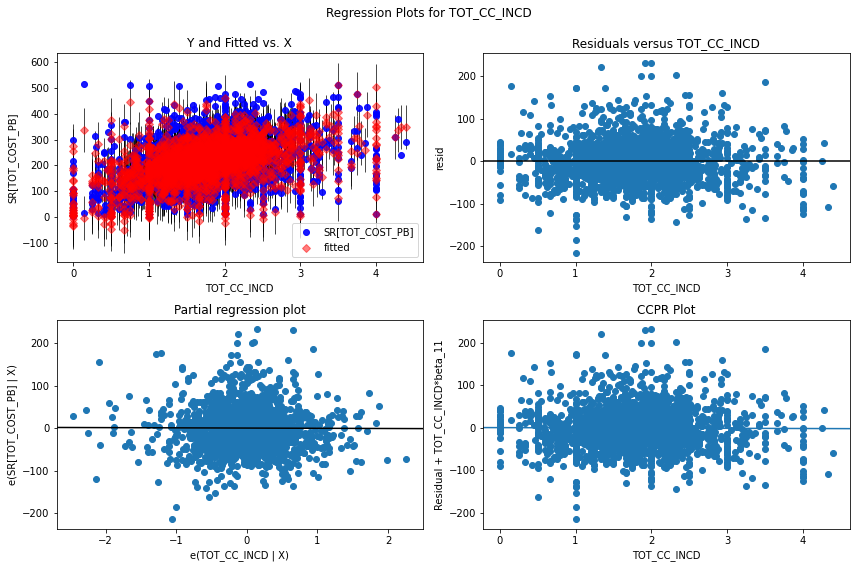

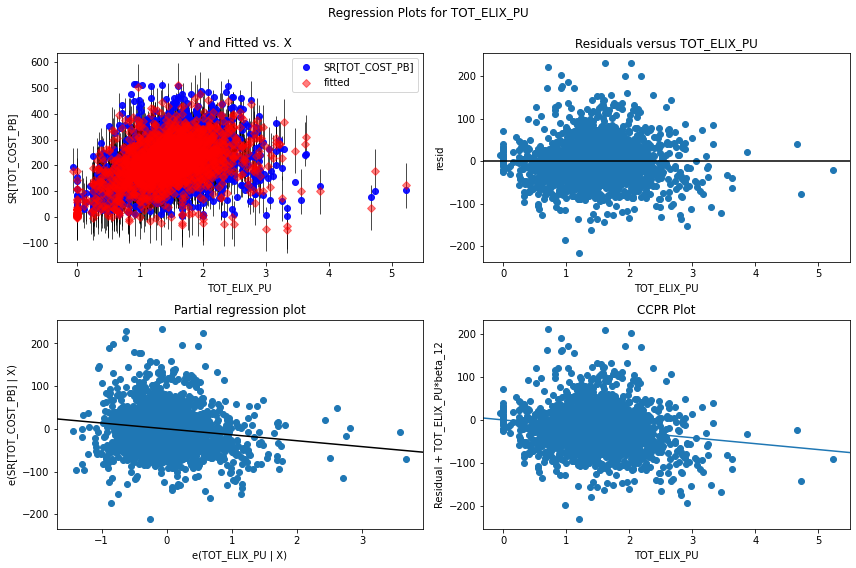

In [11]:
# Create diagnostic plots for all the x variables
variables = X2.columns
for v in variables:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, v, fig=fig)

## Model 2 Review

This is not bad with adjusted R-squared of 0.744.

I first removed CNTY_MEAN_AGE, CNTY_SEX_PROP and TOT_CC_INCD, and left TOT_CC_PREV, PRVDRS_PU and DIVERSE_PROP.

Adjusted R-squared did not change (predictably), but amazingly TOT_CC_PREV was again, insignificant.  So, I removed it, PRVDRS_PU which was insignficant with p-value of 0.085, and DIVERSE_PROP was insignificant as well with p-value > 0.1.

I initially added TOT_CNCR_PREV, TOT_STRK_PREV and TOT_ESRD_PREV but only ESRD_PREV was signficant.

In [12]:

X3 = medicare_counties[["CNTY_IP_PROP", "TOT_VSTS_PB", "CODES_PU", "PROCS_PU", "SR[TOT_IPDAYS_PU]", "TOT_ELIX_PU",
                        "TOT_ESRD_PREV"]]
Y3 = medicare_counties[["SR[TOT_COST_PB]"]]
X3


,CNTY_IP_PROP,TOT_VSTS_PB,CODES_PU,PROCS_PU,SR[TOT_IPDAYS_PU],TOT_ELIX_PU,TOT_ESRD_PREV
0,0.080357,7.000000,9.923077,10.487179,1.921538,1.492308,0.312500
1,0.076389,7.578947,12.179487,13.964103,2.369680,1.651029,0.189474
2,0.097826,6.571429,9.000000,9.388889,2.198484,1.791204,0.285714
3,0.052632,8.941176,11.694444,13.833333,2.160247,1.985728,0.235294
4,0.048780,8.200000,19.333333,22.500000,1.414214,0.760913,0.400000
...,...,...,...,...,...,...,...
2689,0.058824,4.434783,6.761905,7.976190,1.336306,1.201580,0.130435
2690,0.068493,8.588235,9.922222,12.888889,1.949359,2.069084,0.176471
2691,0.054645,6.100000,11.800000,14.222222,1.983263,1.585815,0.200000
2692,0.066667,3.750000,7.000000,7.666667,1.414214,0.361111,0.250000


In [13]:
model = sm.OLS(Y3, sm.add_constant(X3)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        SR[TOT_COST_PB]   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1123.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:54:27   Log-Likelihood:                -13980.
No. Observations:                2694   AIC:                         2.798e+04
Df Residuals:                    2686   BIC:                         2.802e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -20.0850      3.242     -6.195      0.000     -26.442     -13.728
CNTY_IP_PROP        420.8859     34.524     12.191      0.000     353.189     488.583
TOT_VSTS_PB          11.9542      0.544     21.986      0.000      10.888      13.020
CODES_PU              5.1421      0.670      7.673      0.000       3.828       6.456
PROCS_PU              1.5654      0.417      3.758      0.000       0.749       2.382
SR[TOT_IPDAYS_PU]    37.4357      1.992     18.797      0.000      33.530      41.341
TOT_ELIX_PU         -14.5180      1.830     -7.935      0.000     -18.105     -10.931
TOT_ESRD_PREV        20.9235      6.994      2.992      0.003       7.210      34.637
==============================================================================
Omnibus:                      278.102   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              975.954
Skew:                           0.489   Prob(JB):                    1.19e-212
Kurtosis:                       5.782   Cond. No.                         720.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

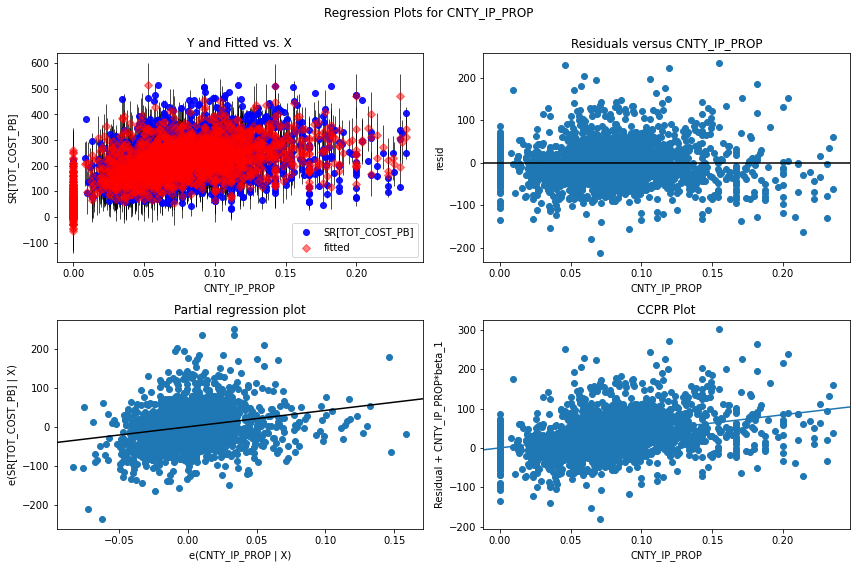

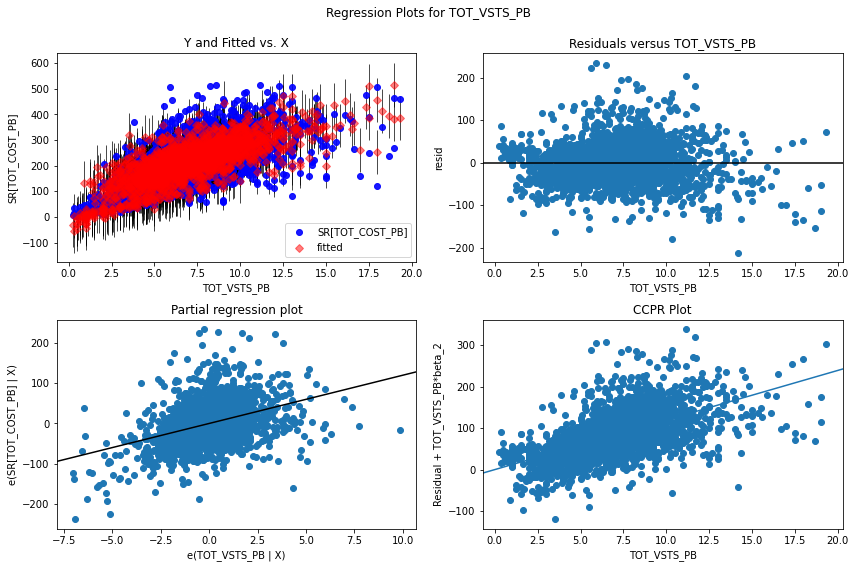

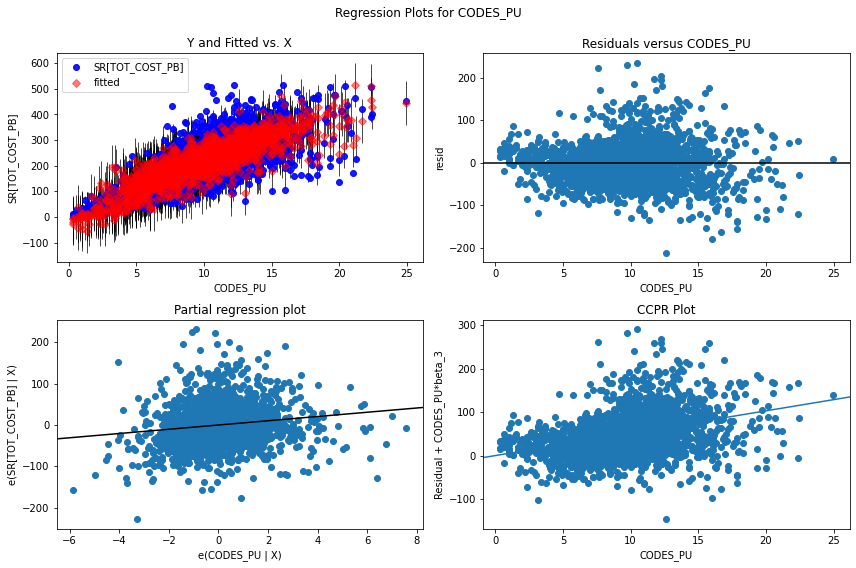

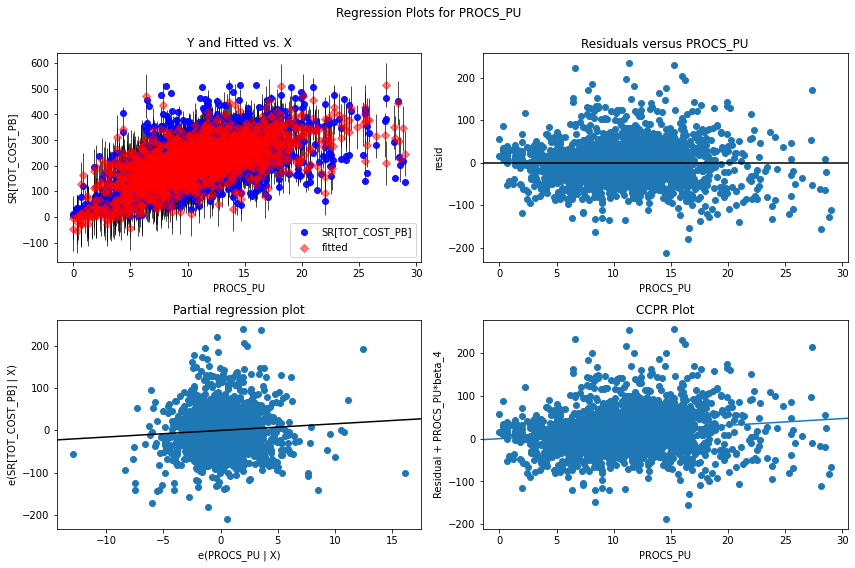

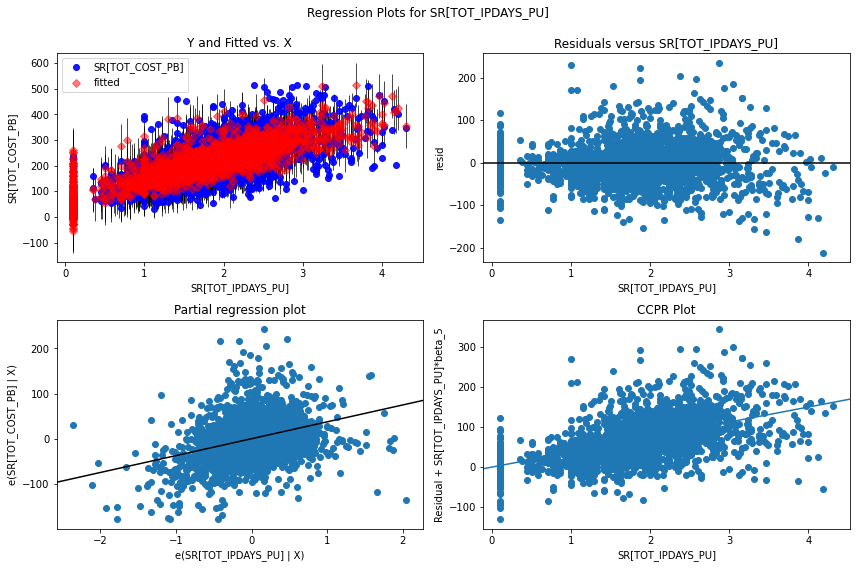

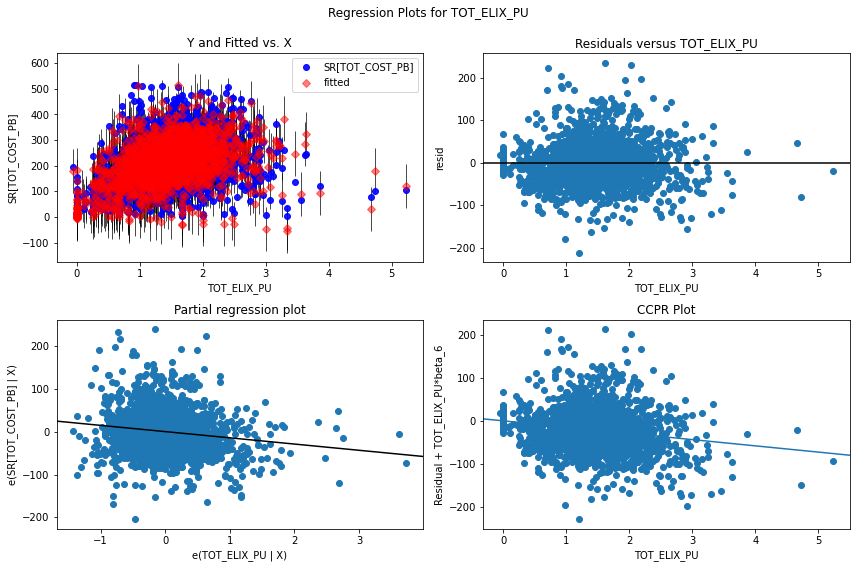

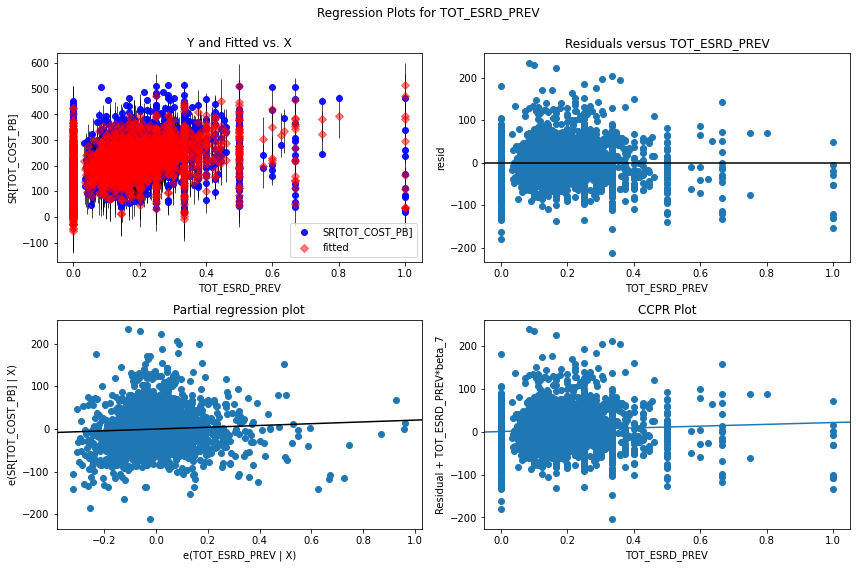

In [14]:
# Create diagnostic plots for all the x variables
variables = X3.columns
for v in variables:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, v, fig=fig)

## Model 3 Review


The final adjusted R-squared is 0.75.

Let's use sklearn's Linear Regression package to try to see if the model has good predictive ability on a holdout set.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
analysis_ds = medicare_counties[["CNTY_IP_PROP", "TOT_VSTS_PB", "CODES_PU", "PROCS_PU", "SR[TOT_IPDAYS_PU]", 
                                 "TOT_ELIX_PU", "TOT_ESRD_PREV", "SR[TOT_COST_PB]"]]

analysis_ds_copy = analysis_ds.copy()

s = pre.StandardScaler()
analysis_ds = s.fit_transform(analysis_ds)

train, test = train_test_split(analysis_ds, test_size=0.25, random_state=121)

train = pd.DataFrame(train, columns=["CNTY_IP_PROP", "TOT_VSTS_PB", "CODES_PU", "PROCS_PU", "SR_TOT_IPDAYS", "TOT_ELIX_PU",
                 "TOT_ESRD_PREV", "SR_TOT_COST_PB"])
test = pd.DataFrame(test, columns=["CNTY_IP_PROP", "TOT_VSTS_PB", "CODES_PU", "PROCS_PU", "SR_TOT_IPDAYS", "TOT_ELIX_PU",
                 "TOT_ESRD_PREV", "SR_TOT_COST_PB"])

train

,CNTY_IP_PROP,TOT_VSTS_PB,CODES_PU,PROCS_PU,SR_TOT_IPDAYS,TOT_ELIX_PU,TOT_ESRD_PREV,SR_TOT_COST_PB
0,3.358003,0.195268,2.361403,0.554634,2.860311,-0.240615,-1.350328,1.362688
1,-0.417294,0.330112,0.123772,0.228734,-0.451168,0.191126,-0.550733,-0.266044
2,0.365825,-0.793029,-0.813047,-0.844122,0.000718,-0.737252,-0.118520,-0.556590
3,-0.657501,0.156450,-0.143372,0.115922,-0.332723,-0.465811,-0.400809,-0.404389
4,1.218596,0.632859,0.954612,0.509638,1.186717,-0.048872,0.721349,1.068589
...,...,...,...,...,...,...,...,...
2015,-1.908231,-1.978566,-2.854018,-1.767161,-2.231963,-2.750628,6.245822,-2.293188
2016,-0.333635,0.328486,0.520565,0.367675,0.165965,-0.021295,-0.400809,0.252554
2017,0.771906,-1.202197,-1.392328,-1.912948,-0.610738,0.530851,-1.350328,-1.051133
2018,0.104439,-0.977458,-1.134988,-0.876240,-0.745700,-0.468624,-0.950530,-0.420266


In [17]:
train_x = train[["CNTY_IP_PROP", "TOT_VSTS_PB", "CODES_PU", "PROCS_PU", "SR_TOT_IPDAYS", "TOT_ELIX_PU",
                 "TOT_ESRD_PREV"]]
train_y = train["SR_TOT_COST_PB"]

test_x = test[["CNTY_IP_PROP", "TOT_VSTS_PB", "CODES_PU", "PROCS_PU", "SR_TOT_IPDAYS", "TOT_ELIX_PU",
                 "TOT_ESRD_PREV"]]
test_y = test["SR_TOT_COST_PB"]

lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [18]:
predictions = lr.predict(test_x)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Coefficients:', lr.coef_)
print('\n')

print('Mean squared error: %.2f'
      % mean_squared_error(test_y, predictions))

print('R-squared: %.2f'
      % r2_score(test_y, predictions))

Coefficients: [ 0.22004822  0.34100039  0.23011434  0.0689542   0.30241092 -0.09485843
  0.02520987]


Mean squared error: 0.27
R-squared: 0.72


## Holdout Performance

So, the sklearn LinearRegression model, which uses OLS, had R-squared of 0.72 on test holdout data!

And the MSE is 0.27.

This is really consistent with the performance of the training data / original model.

**We can be really confident that these 7 variables explain about 70% of the variation in cost.**

That's pretty great!

And this residual vs. predicted plot looks mighty random also!!

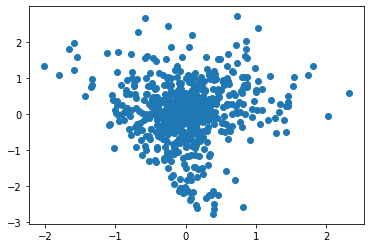

In [20]:
plt.scatter((test_y-predictions),predictions)

plt.show()

In [21]:
from sklearn.metrics import explained_variance_score

explained_variance_score(test_y, predictions)

0.7238351953078548